In [18]:
pip install pandas numpy matplotlib seaborn pyarrow fastparquet


   ---------------------------------------- 0.0/671.0 kB ? eta -:--:--
   ------------------------------- -------- 524.3/671.0 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 671.0/671.0 kB 3.8 MB/s  0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.2 MB/s  0:00:00

   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   ---------------------------------------- 0/3 [fsspec]
   -------------------------- ------------- 2/3 [fastparquet]
   -------------------------- ------------- 2/3 [fastparquet]
   ---------------------------------------- 3/3 [fastparquet]

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

plt.style.use("seaborn-v0_8")
%matplotlib inline
df = pd.read_csv("train.csv", parse_dates=["Date"])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,24924.50,False
1,1,1,12-02-2010,46039.49,True
2,1,1,19-02-2010,41595.55,False
3,1,1,26-02-2010,19403.54,False
4,1,1,05-03-2010,21827.90,False


In [8]:
print(df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())
print("Date range:", df['Date'].min(), "→", df['Date'].max())
print("Unique stores:", df['Store'].nunique())
print("Unique departments:", df['Dept'].nunique())


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Duplicate rows: 0
Date range: 01-04-2011 → 31-12-2010
Unique stores: 45
Unique departments: 81


count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


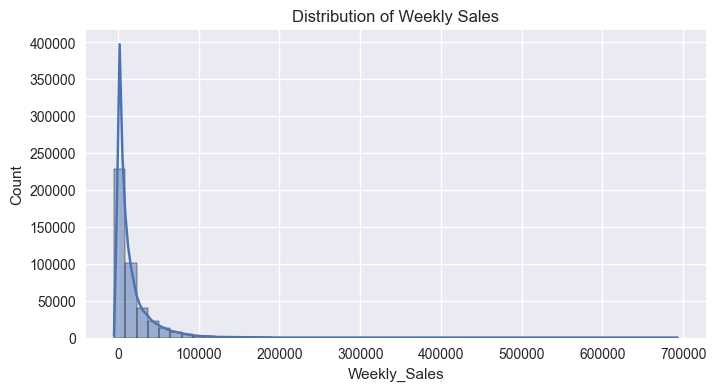

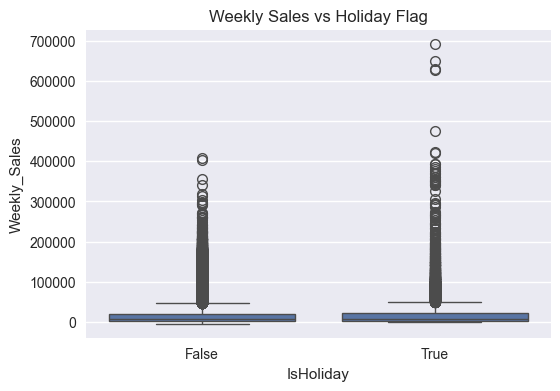

In [9]:
print(df['Weekly_Sales'].describe())

plt.figure(figsize=(8,4))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title("Weekly Sales vs Holiday Flag")
plt.show()


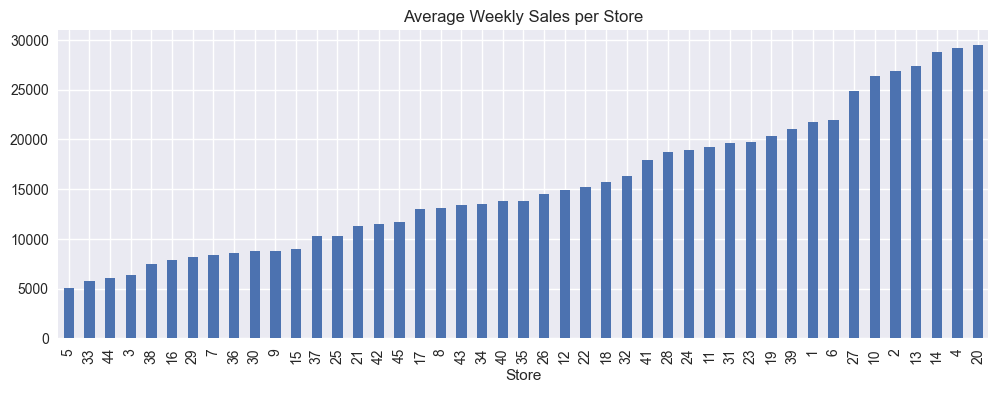

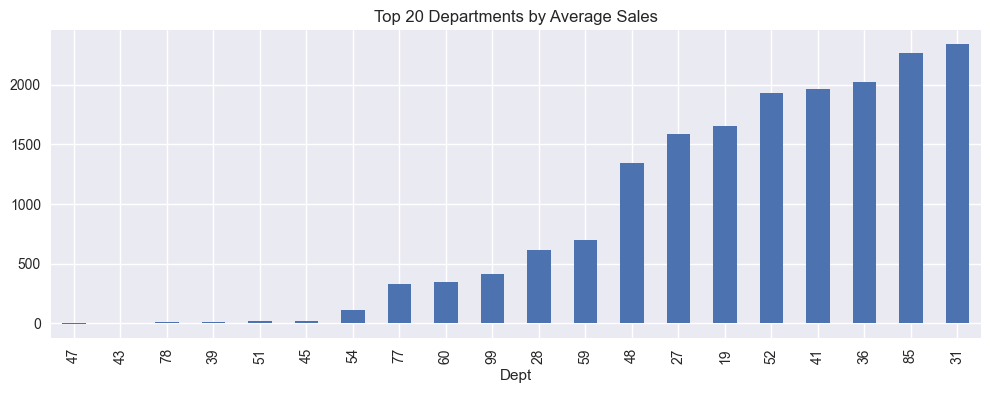

In [10]:
store_sales = df.groupby("Store")['Weekly_Sales'].mean().sort_values()
plt.figure(figsize=(12,4))
store_sales.plot(kind="bar")
plt.title("Average Weekly Sales per Store")
plt.show()

dept_sales = df.groupby("Dept")['Weekly_Sales'].mean().sort_values().head(20)
plt.figure(figsize=(12,4))
dept_sales.plot(kind="bar")
plt.title("Top 20 Departments by Average Sales")
plt.show()


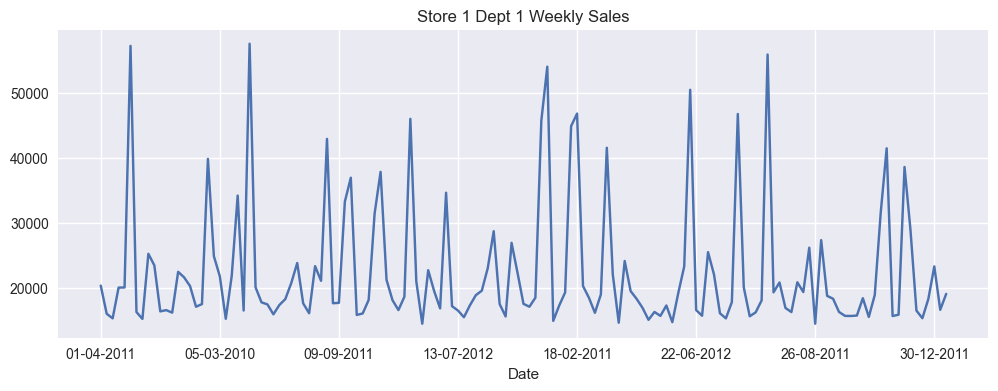

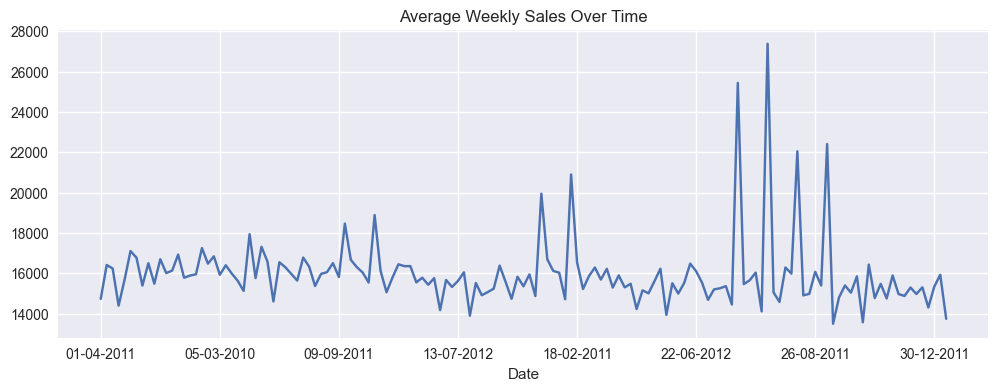

In [11]:
example = df[(df.Store==1) & (df.Dept==1)].set_index("Date").sort_index()

plt.figure(figsize=(12,4))
example['Weekly_Sales'].plot()
plt.title("Store 1 Dept 1 Weekly Sales")
plt.show()

weekly_avg = df.groupby("Date")['Weekly_Sales'].mean()
plt.figure(figsize=(12,4))
weekly_avg.plot()
plt.title("Average Weekly Sales Over Time")
plt.show()


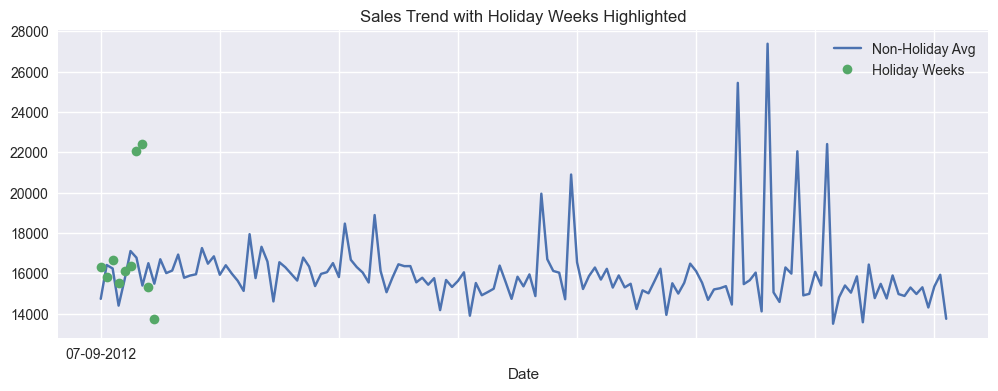

In [12]:
holiday_sales = df[df['IsHoliday']==True].groupby("Date")['Weekly_Sales'].mean()

plt.figure(figsize=(12,4))
weekly_avg.plot(label="Non-Holiday Avg")
holiday_sales.plot(style="o", label="Holiday Weeks")
plt.legend()
plt.title("Sales Trend with Holiday Weeks Highlighted")
plt.show()


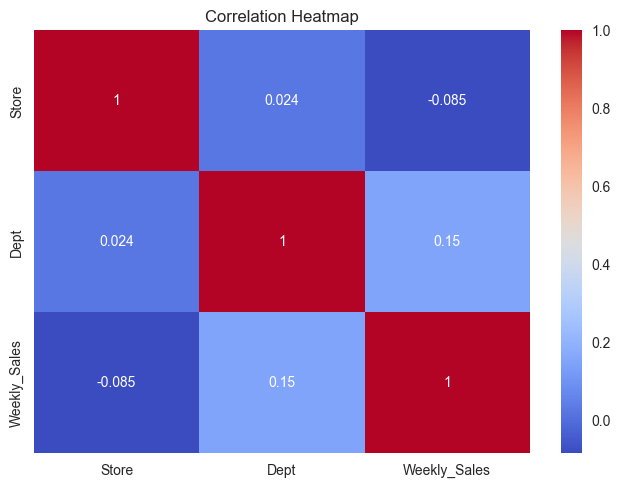

In [13]:
corr = df[['Store','Dept','Weekly_Sales']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


      Store  Dept        Date  Weekly_Sales  IsHoliday
904       1     7  24-12-2010     166697.72      False
956       1     7  23-12-2011     119302.15      False
5118      1    38  05-02-2010     115564.35      False
5122      1    38  05-03-2010     108282.86      False
5130      1    38  30-04-2010     127811.89      False


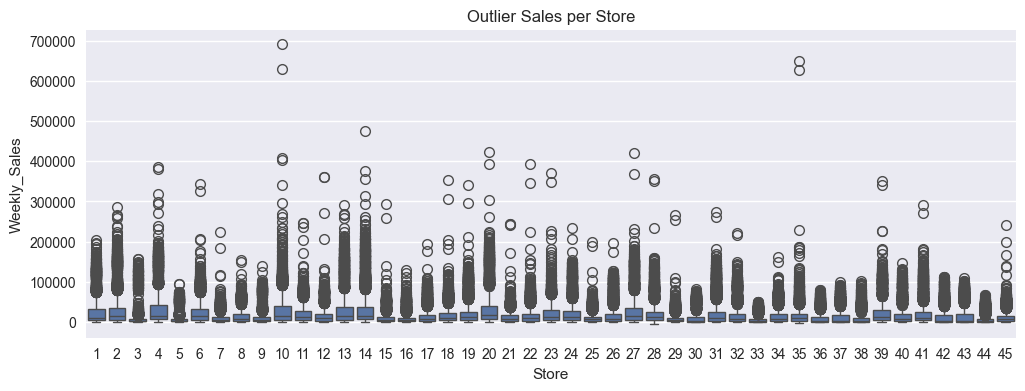

In [14]:
outliers = df[df['Weekly_Sales'] > df['Weekly_Sales'].quantile(0.99)]
print(outliers.head())

plt.figure(figsize=(12,4))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.title("Outlier Sales per Store")
plt.show()


In [21]:
df = df.sort_values(by=["Store","Dept","Date"]).reset_index(drop=True)
df.to_csv("cleaned_walmart.csv", index=False)

